In [19]:
import os

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## 1. Data Processing and Visualization

### 1.1 Data Import

In [20]:
subject_data = pd.read_csv(os.getcwd() + '/Data/s10_sit.csv')

subject_data.head()

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 11:42:11.380563,29634,0,66165,68100,3605,90569,99964,6084,6309080,6604837,33.94,36.00,33.172401,5.588950,4.046407,-6.884279,0.000282,-0.071532,0.036767
1,2021-01-01 11:42:11.382563,29687,0,66160,68084,3603,90569,99964,6084,6309080,6604837,33.94,36.00,33.178394,5.601521,4.040421,-6.910018,0.002013,-0.071799,0.033970
2,2021-01-01 11:42:11.384563,29785,0,66149,68081,3606,90571,99960,6082,6308823,6603053,33.94,36.00,33.175400,5.614689,4.033238,-6.938151,0.003079,-0.073396,0.031440
3,2021-01-01 11:42:11.386563,29887,0,66153,68071,3594,90580,99967,6084,6308823,6603053,33.94,36.00,33.181389,5.620076,4.036231,-6.944736,0.004144,-0.075793,0.028644
4,2021-01-01 11:42:11.388563,29944,0,66153,68071,3594,90579,99948,6082,6308823,6603053,33.94,35.63,33.184383,5.618280,4.024858,-6.936954,0.004810,-0.079122,0.025182


### 1.2 Extract relevant info

pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)

pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)

pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)

pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)

pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)

pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)

In [21]:
# Extract IR and red from proximal phalanx
ppg_data = subject_data[['time', 'pleth_4', 'pleth_5']]

ppg_data.head()

,time,pleth_4,pleth_5
0,2021-01-01 11:42:11.380563,90569,99964
1,2021-01-01 11:42:11.382563,90569,99964
2,2021-01-01 11:42:11.384563,90571,99960
3,2021-01-01 11:42:11.386563,90580,99967
4,2021-01-01 11:42:11.388563,90579,99948


### 1.3 Data Processing

In [22]:
# Rename appropriately
ppg_data = ppg_data.rename(columns={'pleth_4': 'Red', 'pleth_5': 'IR'})

# Data is really large, so we'll only grab the first 5k samples for now.
ppg_data = ppg_data[0:5000]

ppg_data.head()

,time,Red,IR
0,2021-01-01 11:42:11.380563,90569,99964
1,2021-01-01 11:42:11.382563,90569,99964
2,2021-01-01 11:42:11.384563,90571,99960
3,2021-01-01 11:42:11.386563,90580,99967
4,2021-01-01 11:42:11.388563,90579,99948


In [23]:
# Confirming some things..

print(len(ppg_data))
print(type(ppg_data['time'][0]))

5000
<class 'str'>


In [24]:
# Convert time strs into timestamps
ppg_data['time'] = pd.to_datetime(ppg_data['time'])

# Create new ts column and calculate
ppg_data['ts'] = (ppg_data['time'] - ppg_data['time'][0]).dt.total_seconds()

# Drop time column and rearrange
final_df = ppg_data.copy().drop('time', axis=1)
final_df = final_df[['ts', 'IR', 'Red']]

final_df.head()

,ts,IR,Red
0,0.000,99964,90569
1,0.002,99964,90569
2,0.004,99960,90571
3,0.006,99967,90580
4,0.008,99948,90579


### 1.4 Visualize data

<IPython.core.display.Javascript object>


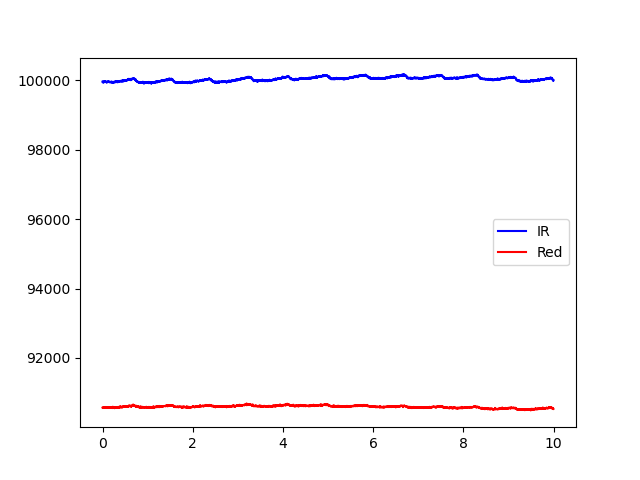

In [25]:
plt.figure()
plt.plot(final_df['ts'], final_df['IR'], color='blue', label='IR')
plt.plot(final_df['ts'], final_df['Red'], color='red', label='Red')
plt.legend()